# Mailchimp May 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import datetime

In [2]:
num_list=np.arange(0, 31).tolist()

for x in [0,1,8,15,20,22,25,27,28]:
     num_list.remove(x)

In [3]:
var={}
for i in num_list:
    name='5.'+str(i)+'open.csv'
    var[i]=pd.read_csv(name)
var[2]

,Email Address,First Name,Last Name,Address,Phone Number,Boutique,Website,user_id,username,Member Rating,Opens
0,jeannette@leprix.com,Jeannette,Oh,NaN,NaN,NaN,NaN,NaN,NaN,5,1
1,farheen@edoubletake.com,MARCI,KESSLER,774 Morris Tpke Short Hills NJ 07078-2698...,12013206980,doubletake,NaN,NaN,NaN,5,2
2,theupsideca@gmail.com,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,5,1
3,wendy.ezrailson@gmail.com,NaN,NaN,US,NaN,wendy.s.red,NaN,3992.0,wendy.s.red,5,2
4,shelbi@consignsavvys.com,Shelbi,Weeks,NaN,18136436020,NaN,NaN,212277.0,Savvy Consignment Boutique,5,1
...,...,...,...,...,...,...,...,...,...,...,...
74,kcncomp@gmail.com,Chrissy,Nason,NaN,17752476666,NaN,NaN,215821.0,The Unique Store,2,1
75,jennifer@consignsewickley.com,Jennifer,Zeitler,NaN,17248161332,NaN,NaN,214665.0,Consign Sewickley,5,2
76,info@commonwealthnantucket.com,Eileen,Harkness,NaN,15086801399,Commonwealth,NaN,212093.0,Commonwealth,5,1
77,rachel@shopspankys.com,Rachel,Phillips,WA US,15033412112,spankysvancouver,NaN,201449.0,spankysvancouver,5,1


In [4]:
bid=pd.read_csv('all_bid.csv')
stock=pd.read_csv('all_stock.csv')

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
bid['bid_placed_on']=pd.to_datetime(bid['bid_placed_on'])
stock['submitted_date']=pd.to_datetime(stock['submitted_date'])

In [6]:
bid=bid[(bid['bid_placed_on'].dt.month==5)&(bid['bid_placed_on'].dt.year==2021)]
stock=stock[(stock['submitted_date'].dt.month==5)&(stock['submitted_date'].dt.year==2021)]

In [7]:
win=bid[bid['win']=='Y']

In [8]:
emails=pd.read_csv('buyer_emails.csv')
emails['email']=emails['email'].str.lower()
emails.head()

,user_id,username,email,first_purchase_date
0,201448,2ndChanceResaleOH,hollylaz@yahoo.com,7/10/19
1,201076,absolutelyherstore,info@absolutelyherstore.com,5/22/19
2,203516,Addiction Studios,info@addictionstudios.com,9/10/19
3,200853,Adore The Couture,info@adorethecouture.com,5/1/19
4,200491,Agents In Style,rhoda@agentsinstyle.com,6/8/20


In [9]:
stock=stock.merge(emails, left_on='buyer_id', right_on='user_id', how='left')
win=win.merge(emails, left_on='buyer_id', right_on='user_id', how='left')

In [10]:
gmv={}
for i in num_list:
    day_s=stock[stock['submitted_date'].dt.day==i]
    buy_list=(var[i]['Email Address'])
    day_s=day_s[day_s['email'].isin(buy_list)]
    
    day_b=win[win['bid_placed_on'].dt.day==i]
    day_b=day_b[day_b['email'].isin(buy_list)]
    gmv[i]=day_s['price'].sum()+day_b['winning_price'].sum()
gmv

{2: 0.0,
 3: 254.0,
 4: 0.0,
 5: 1223.0,
 6: 0.0,
 7: 0.0,
 9: 254.0,
 10: 0.0,
 11: 1702.0,
 12: 8150.0,
 13: 647.0,
 14: 5817.0,
 16: 0.0,
 17: 17117.0,
 18: 4741.0,
 19: 18585.0,
 21: 729.0,
 23: 125.0,
 24: 0.0,
 26: 13401.65,
 29: 4097.0,
 30: 1878.15}

In [11]:
gmv_new=pd.DataFrame.from_dict(gmv, orient='index').reset_index().rename(columns={0:'gmv', 'index':'day'})

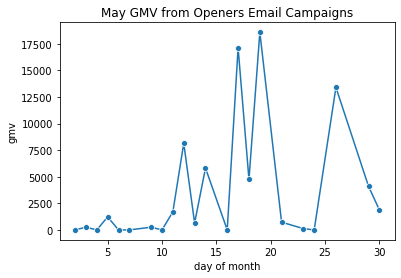

In [12]:
sns.lineplot(x='day', y='gmv', data=gmv_new, marker='o')
plt.xlabel('day of month')
plt.title('May GMV from Openers Email Campaigns')
plt.show()

In [13]:
x={}
for i in num_list:
    name='5.'+str(i)+'click.csv'
    x[i]=pd.read_csv(name)
x[2]

,Email Address,First Name,Last Name,Address,Phone Number,Boutique,Website,user_id,username,Member Rating,URL,Clicks
0,mjfaas@gmail.com,Melinda,Faas,NaN,19072231989,NaN,NaN,207947,Plain Jane Consignments,5,https://wholesale.leprix.com/blog/post/how-to-...,1
1,ldraggon@gmail.com,Leitavia,Junk Jeans,US,17024174771,ldraggon,NaN,195428,Junk Jeans,5,https://wholesale.leprix.com/blog/post/how-to-...,1
2,egpnyc@gmail.com,Eileen,Potrock,NJ US,19178647349,edesigner,NaN,107712,E Designer,5,https://wholesale.leprix.com/blog/post/how-eas...,1
3,nu2ucf@gmail.com,Lori,Almeida,NJ US,16099817077,nu2ucf,NaN,197047,nu2ucf,4,https://wholesale.leprix.com/blog/post/how-eas...,1
4,nu2ucf@gmail.com,Lori,Almeida,NJ US,16099817077,nu2ucf,NaN,197047,nu2ucf,4,https://wholesale.leprix.com/blog/post/flashba...,1
5,jessica@ellajboutique.com,Jessica,Halim,NaN,19259130560,NaN,NaN,216167,Ella J Boutique,5,https://wholesale.leprix.com/blog/?mc_cid=7fb1...,1
6,jennifer@consignsewickley.com,Jennifer,Zeitler,NaN,17248161332,NaN,NaN,214665,Consign Sewickley,5,https://wholesale.leprix.com/blog/post/flashba...,1


In [14]:
gmv2={}
for i in num_list:
    day_s=stock[stock['submitted_date'].dt.day==i]
    buy_list=(x[i]['Email Address'])
    day_s=day_s[day_s['email'].isin(buy_list)]
    
    day_b=win[win['bid_placed_on'].dt.day==i]
    day_b=day_b[day_b['email'].isin(buy_list)]
    gmv2[i]=day_s['price'].sum()+day_b['winning_price'].sum()
gmv2

{2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 9: 0.0,
 10: 0.0,
 11: 1100.0,
 12: 0.0,
 13: 0.0,
 14: 1866.0,
 16: 0.0,
 17: 0.0,
 18: 830.0,
 19: 8547.0,
 21: 254.0,
 23: 125.0,
 24: 0.0,
 26: 10202.65,
 29: 4097.0,
 30: 553.0}

In [15]:
gmv2_new=pd.DataFrame.from_dict(gmv2, orient='index').reset_index().rename(columns={0:'gmv', 'index':'day'})

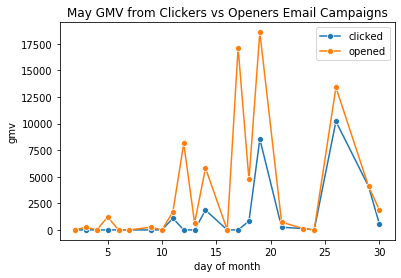

In [16]:
sns.lineplot(x='day', y='gmv', data=gmv2_new, marker='o', label='clicked')
sns.lineplot(x='day', y='gmv', data=gmv_new, marker='o', label='opened')
plt.xlabel('day of month')
plt.title('May GMV from Clickers vs Openers Email Campaigns')
plt.show()

In [17]:
gmv2_new['gmv'].sum()

27574.65

In [18]:
gmv_new['gmv'].sum()

78720.79999999999

In [19]:
gmv_new.sort_values(by='gmv', ascending=False)

,day,gmv
15,19,18585.00
13,17,17117.00
19,26,13401.65
9,12,8150.00
11,14,5817.00
14,18,4741.00
20,29,4097.00
21,30,1878.15
8,11,1702.00
3,5,1223.00


## Update Subscribers

In [20]:
wholesale=pd.read_csv('wholesale.csv')
wholesale['Email Address']=wholesale['Email Address'].str.lower()

In [21]:
stages=pd.read_excel('stages_updated.xlsx')
stages['Email']=stages['Email'].str.lower()

In [22]:
stage_whole=wholesale.merge(stages[['Prospect Stage', 'Email']],
                            left_on='Email Address', right_on='Email', how='left')

In [23]:
stage_map={'Stage 6 : 100% Transacted at Least Once':6,
 'Stage 1 : 10% Unqualified Prospect':1,
 'Stage 7 : Inactive':7,
 'Stage 0 : 0% No longer a prospect':0,
 'Stage 2 : 20% Identified Opportunity':2,
 'Stage 5 : 80% Attempted a Purchase':5,
 'Stage 4 : 60% Negotiation in Progress':4,
 'Stage 3 : 40% Qualified Opportunity':3}

stage_whole['stage']=stage_whole['Prospect Stage'].map(stage_map)
stage_whole.head()

,Email Address,First Name,Last Name,Address,Phone Number,Boutique,Website,user_id,username,MEMBER_RATING,...,CC,REGION,LAST_CHANGED,LEID,EUID,NOTES,TAGS,Prospect Stage,Email,stage
0,leslie@alexissuitcase.com,Leslie,Brown,NaN,17703900010,NaN,NaN,104928.0,Alexis Suitcase,5,...,NaN,NaN,2021-05-19 12:30:21,339904092,d97901dd72,NaN,NaN,Stage 6 : 100% Transacted at Least Once,leslie@alexissuitcase.com,6.0
1,emily+shopshops@leprix.com,Xiaofei,Yang,NaN,16463316466,NaN,NaN,218652.0,ShopShops,3,...,us,dc,2021-05-19 12:30:17,339904088,6530fb4283,NaN,NaN,NaN,NaN,NaN
2,traciegrubb@gmail.com,Tracie,Grubb,NaN,19856747776,NaN,NaN,217153.0,Style Encore Mandeville,2,...,us,ms,2021-05-07 11:36:31,339900792,6a9502113f,NaN,NaN,Stage 6 : 100% Transacted at Least Once,traciegrubb@gmail.com,6.0
3,latonstrong@gmail.com,Laton,Strong,NaN,13147185056,NaN,NaN,218565.0,LaSha's Boutique,5,...,us,mo,2021-05-19 12:30:21,339904096,6d277eb79e,NaN,NaN,Stage 6 : 100% Transacted at Least Once,latonstrong@gmail.com,6.0
4,seth@wgacany.com,NaN,NaN,NaN,NaN,WGACA,NaN,NaN,NaN,5,...,us,ny,2021-04-22 12:26:25,339895840,18ca05fc01,NaN,"""MARKETING - Hermès""",NaN,NaN,NaN


In [24]:
stage_wremove=stage_whole[stage_whole['stage'].isin([0,1,2,3,4,5,7])][['Email','stage']]

In [25]:
pros=pd.read_csv('prospects.csv')
pros['Email Address']=pros['Email Address'].str.lower()

In [26]:
stage_pros=pros.merge(stages[['Prospect Stage', 'Email']],
                            left_on='Email Address', right_on='Email', how='left')

In [27]:
stage_pros['stage']=stage_pros['Prospect Stage'].map(stage_map)
stage_pros.head()

,Email Address,First Name,Last Name,Address,Phone Number,Store Name,Website,BD,MEMBER_RATING,OPTIN_TIME,...,CC,REGION,LAST_CHANGED,LEID,EUID,NOTES,TAGS,Prospect Stage,Email,stage
0,shop@krausestetson.com,DIANE,KRAUSE-STETSON,US,(608) 630-8599,NaN,NaN,NaN,3,2021-04-02 18:32:15,...,us,wi,2021-04-02 18:32:15,339889116,1561c99dff,NaN,"""PROSPECT - Mar,Franchise""",Stage 4 : 60% Negotiation in Progress,shop@krausestetson.com,4.0
1,info@shopretold.com,NaN,NaN,US,'+971 50 524 5721,NaN,NaN,NaN,4,2021-04-02 18:32:15,...,NaN,NaN,2021-04-02 18:32:15,339889108,ed3537ef7b,NaN,"""PROSPECT - Mar,Franchise""",Stage 2 : 20% Identified Opportunity,info@shopretold.com,2.0
2,bearlybynicole@gmail.com,NaN,NaN,US,'+971 50 919 0927,NaN,NaN,NaN,3,2021-04-02 18:32:15,...,NaN,NaN,2021-04-02 18:32:15,339889104,3ba5a193ca,NaN,"""PROSPECT - Mar,Franchise""",Stage 2 : 20% Identified Opportunity,bearlybynicole@gmail.com,2.0
3,info@garderobe.ae,NaN,NaN,US,'+971 4 3942753,NaN,NaN,NaN,2,2021-04-02 18:32:15,...,NaN,NaN,2021-04-02 18:32:15,339889096,79ed55c31a,NaN,"""PROSPECT - Mar,Franchise""",Stage 2 : 20% Identified Opportunity,info@garderobe.ae,2.0
4,boutique2look@gmail.com,Mario,Robichaud,US,(506) 384-4757,NaN,NaN,NaN,4,2021-04-02 18:32:15,...,NaN,NaN,2021-04-02 18:32:15,339889092,f8cef2d4fc,NaN,"""PROSPECT - Mar,Franchise""",Stage 2 : 20% Identified Opportunity,boutique2look@gmail.com,2.0


In [28]:
stage_premove=stage_pros[stage_pros['stage'].isin([5,6])][['Email','stage']]

In [29]:
# stage_premove.to_excel('off_prospect.xlsx')
# stage_wremove.to_excel('off_wholesale.xlsx')

In [30]:
emails=pd.read_csv('buyer_emails.csv')

In [31]:
emails['email']=emails['email'].str.lower()

In [32]:
emails

,user_id,username,email,first_purchase_date
0,201448,2ndChanceResaleOH,hollylaz@yahoo.com,7/10/19
1,201076,absolutelyherstore,info@absolutelyherstore.com,5/22/19
2,203516,Addiction Studios,info@addictionstudios.com,9/10/19
3,200853,Adore The Couture,info@adorethecouture.com,5/1/19
4,200491,Agents In Style,rhoda@agentsinstyle.com,6/8/20
...,...,...,...,...
360,182715,WGACA,luxbuyers@wgacany.com,11/11/19
361,196586,Worth The Wait VA,hello@worththewaitusa.com,2/9/19
362,207130,YOLO Luxury Consignment,info@yololuxuryconsignment.com,3/11/20
363,204761,Yvesse,paper1231@gmail.com,12/4/19


In [33]:
active=stage_pros[stage_pros['Email Address'].isin(list(emails['email']))]

In [34]:
new_stage_premove=stage_premove.merge(active[['Email Address']], left_on='Email',
                                      right_on='Email Address', how='left')
new_stage_premove=new_stage_premove.drop(columns='Email Address')

In [35]:
new_stage_premove.to_excel('off_prospect.xlsx')

In [36]:
stage_wremove=stage_wremove[(stage_wremove['Email']!='luisa@leprix.com')&(stage_wremove['Email']!='carrie@leprix.com')]

In [37]:
new_ws=wholesale[~wholesale['Email Address'].isin(list(stage_wremove['Email']))]

In [38]:
new_pros=pros[~pros['Email Address'].isin(list(new_stage_premove['Email']))]

In [39]:
# new_ws.to_excel('updated_wholesale.xlsx')
# new_pros.to_excel('updated_prospects.xlsx')

## B2C Removal List: WS Only Buyers who are Not B2C Sellers

In [40]:
b2c_sub=pd.read_excel('b2c_sub.xlsx')

In [41]:
b2c_sub['Email Address']=b2c_sub['Email Address'].str.lower()

In [42]:
active_stores=pd.read_excel('active_stores_b2c.xlsx')

In [43]:
active_stores['email']=active_stores['email'].str.lower()

In [44]:
b2c_remove=b2c_sub[b2c_sub['Email Address'].isin(list(new_ws['Email Address']))]
b2c_remove.shape

(221, 38)

In [45]:
b2c_remove=b2c_remove[~b2c_remove['Email Address'].isin(list(active_stores['email']))]

In [55]:
b2c_remove.shape

(192, 38)

In [46]:
orders=pd.read_csv('june20_21_orders.csv')

In [54]:
b2c_buyers=list(orders['Buyer Email'].unique())

In [56]:
b2c_remove=b2c_remove[~b2c_remove['Email Address'].isin(b2c_buyers)]
b2c_remove.shape

(171, 38)

In [57]:
# b2c_remove.to_excel('off_b2c.xlsx')

### Prospect Listserv Tagged w/ B2C Sellers

In [48]:
prospect=pd.read_excel('prospect.xlsx')
prospect

,Email Address
0,shop@krausestetson.com
1,info@shopretold.com
2,bearlybynicole@gmail.com
3,info@garderobe.ae
4,boutique2look@gmail.com
...,...
2601,mgraham2052@yahoo.com
2602,cookie88@comcast.net
2603,jadubbenterprises@gmail.com
2604,help@shopwasteland.com


In [49]:
prospect.loc[prospect['Email Address'].isin(list(active_stores['email'])),'b2c_seller']='Y'

In [50]:
# prospect.to_excel('b2c_sell_tag.xlsx')